In [144]:
import nicepy as npy
import cvxpy

%matplotlib inline

# Problem 5

In [145]:
x5 = np.array([-3, -2, 3, -1, 0, 1])
y5 = np.array([1, 1, 1, -1, -1, -1])
phi5 = np.array([x5, x5**2])

## c)

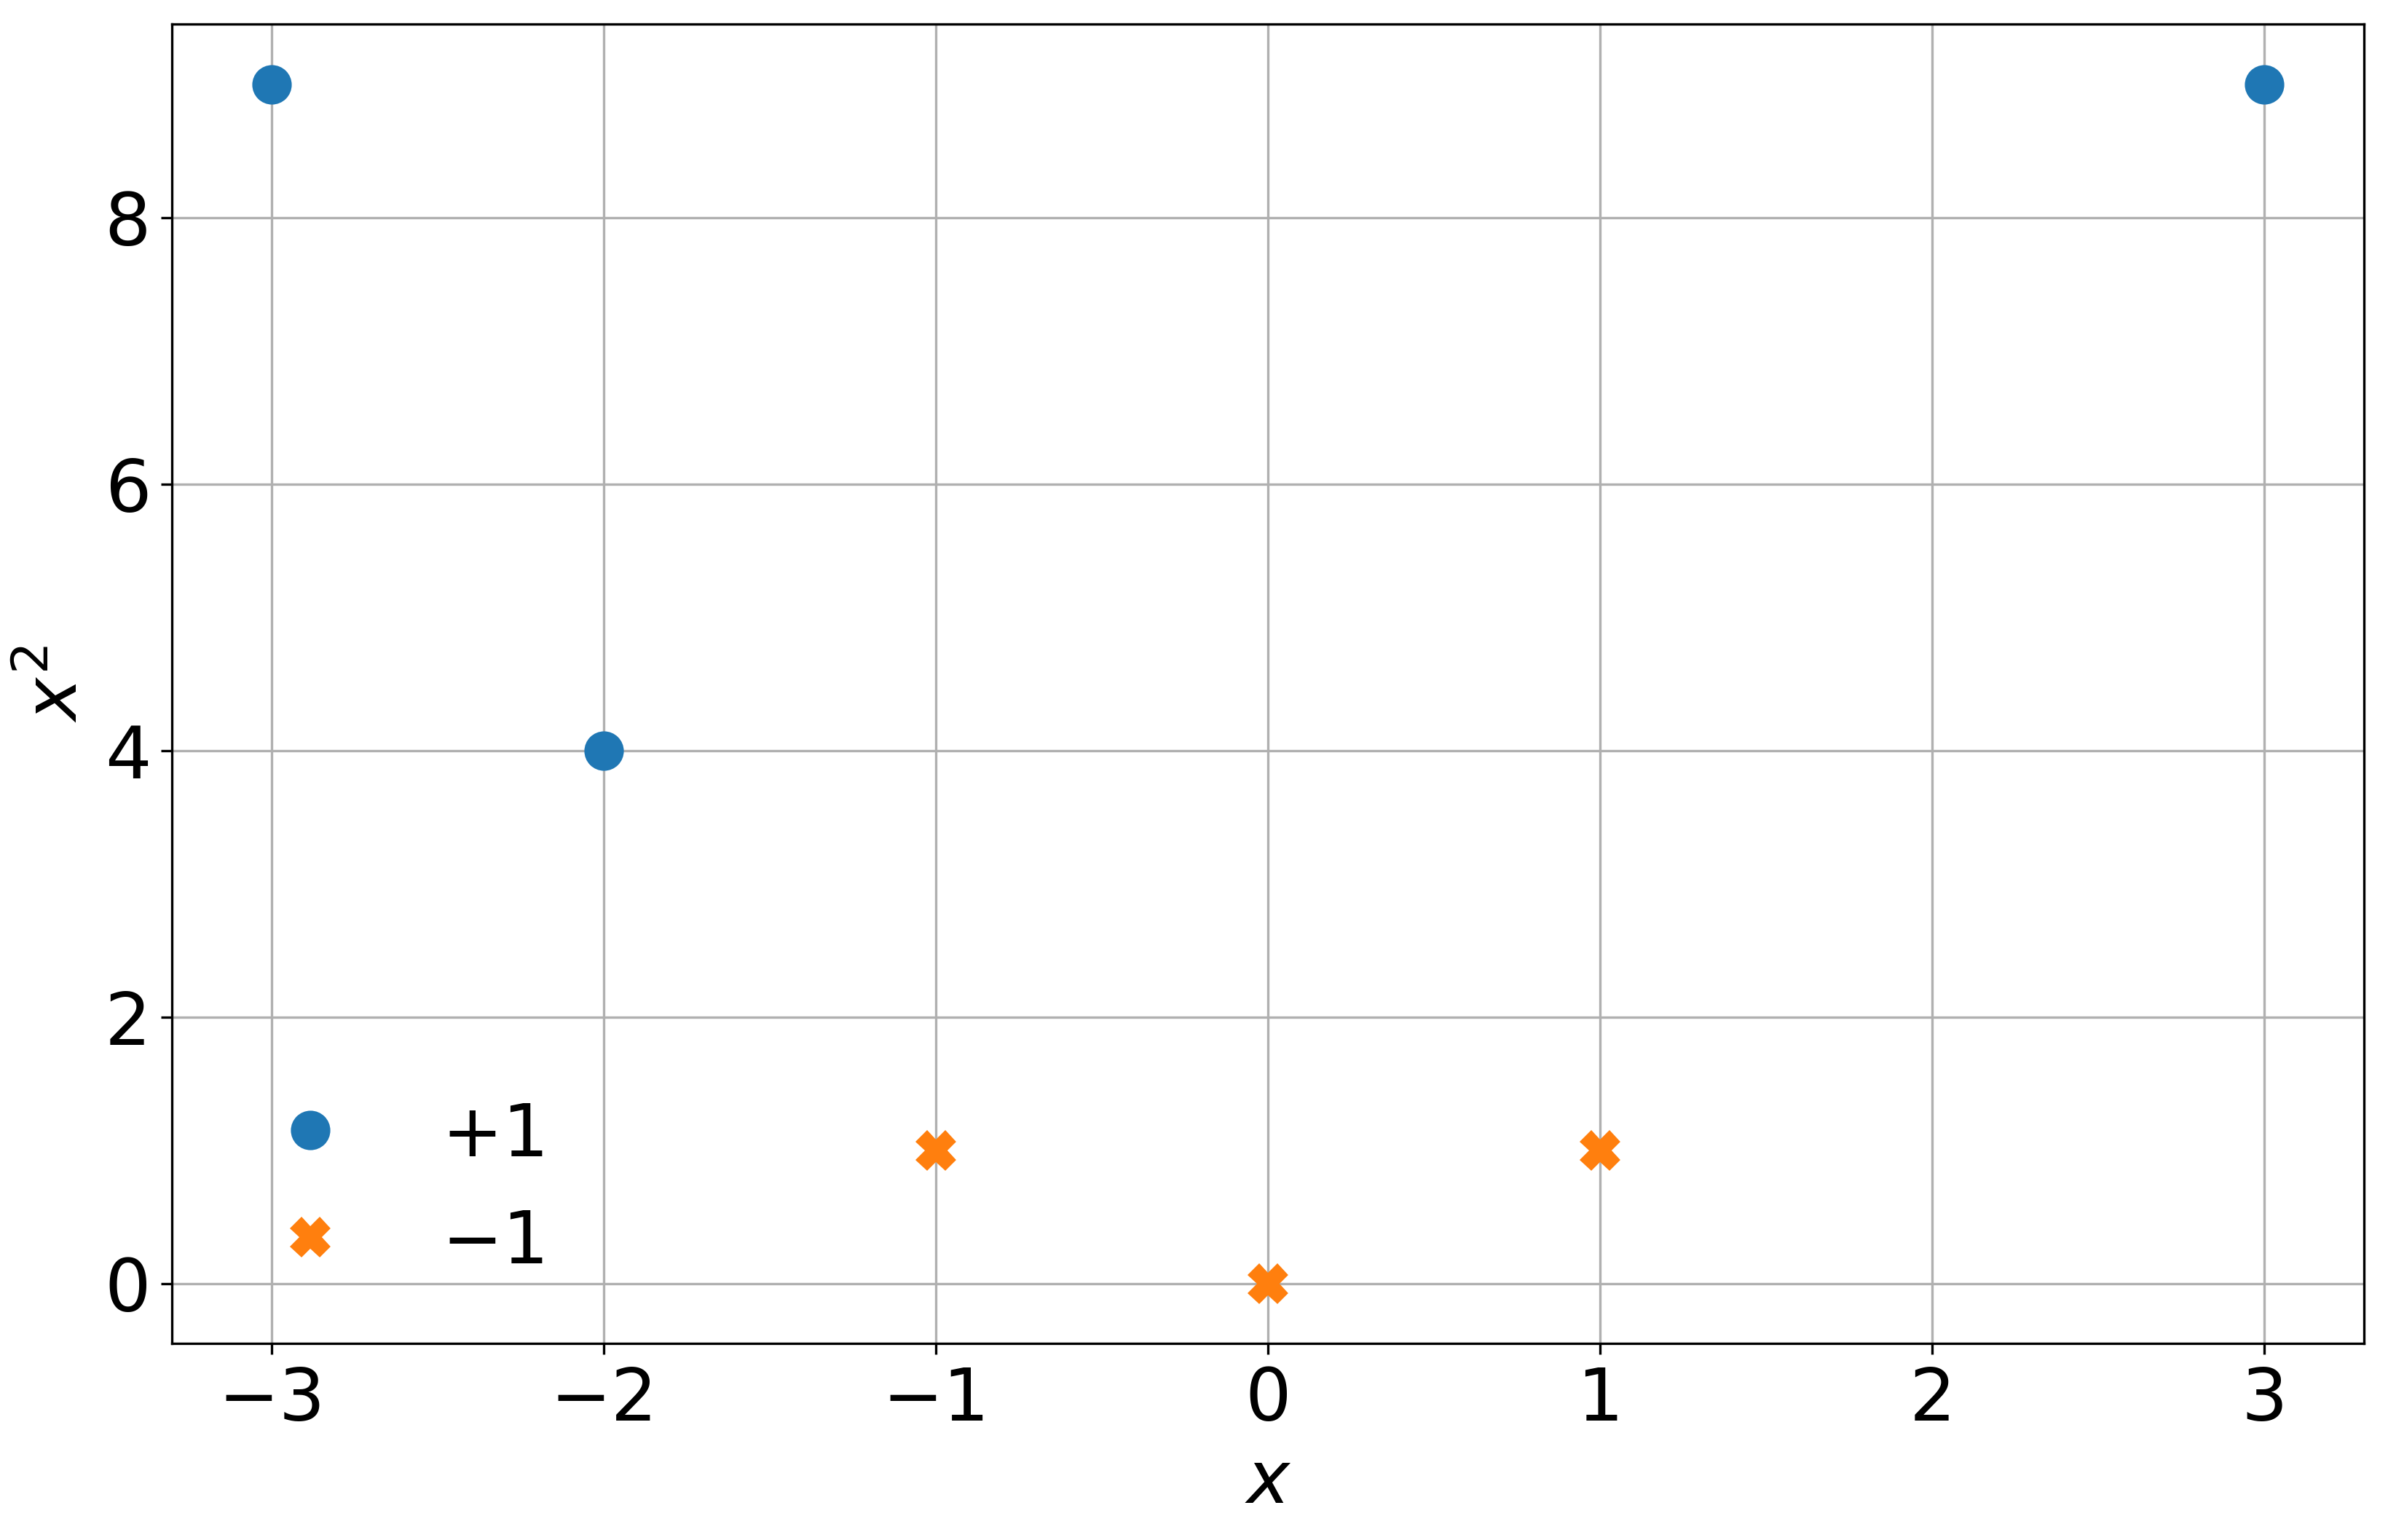

In [146]:
fig, ax = plt.subplots()
ax.plot(phi5[0][y5==1], phi5[1][y5==1], marker='o', markersize=12, linestyle='', label='$+1$')
ax.plot(phi5[0][y5==-1], phi5[1][y5==-1], marker='X', markersize=12, linestyle='', label='$-1$')
ax.set_xlabel('$x$')
ax.set_ylabel('$x^2$')

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid()
fig.savefig('5c.png', bbox_inches='tight')

## d)

In [147]:
def linear(x, w, b):
    output = -(w[0]*x+b)/w[1]
    return output

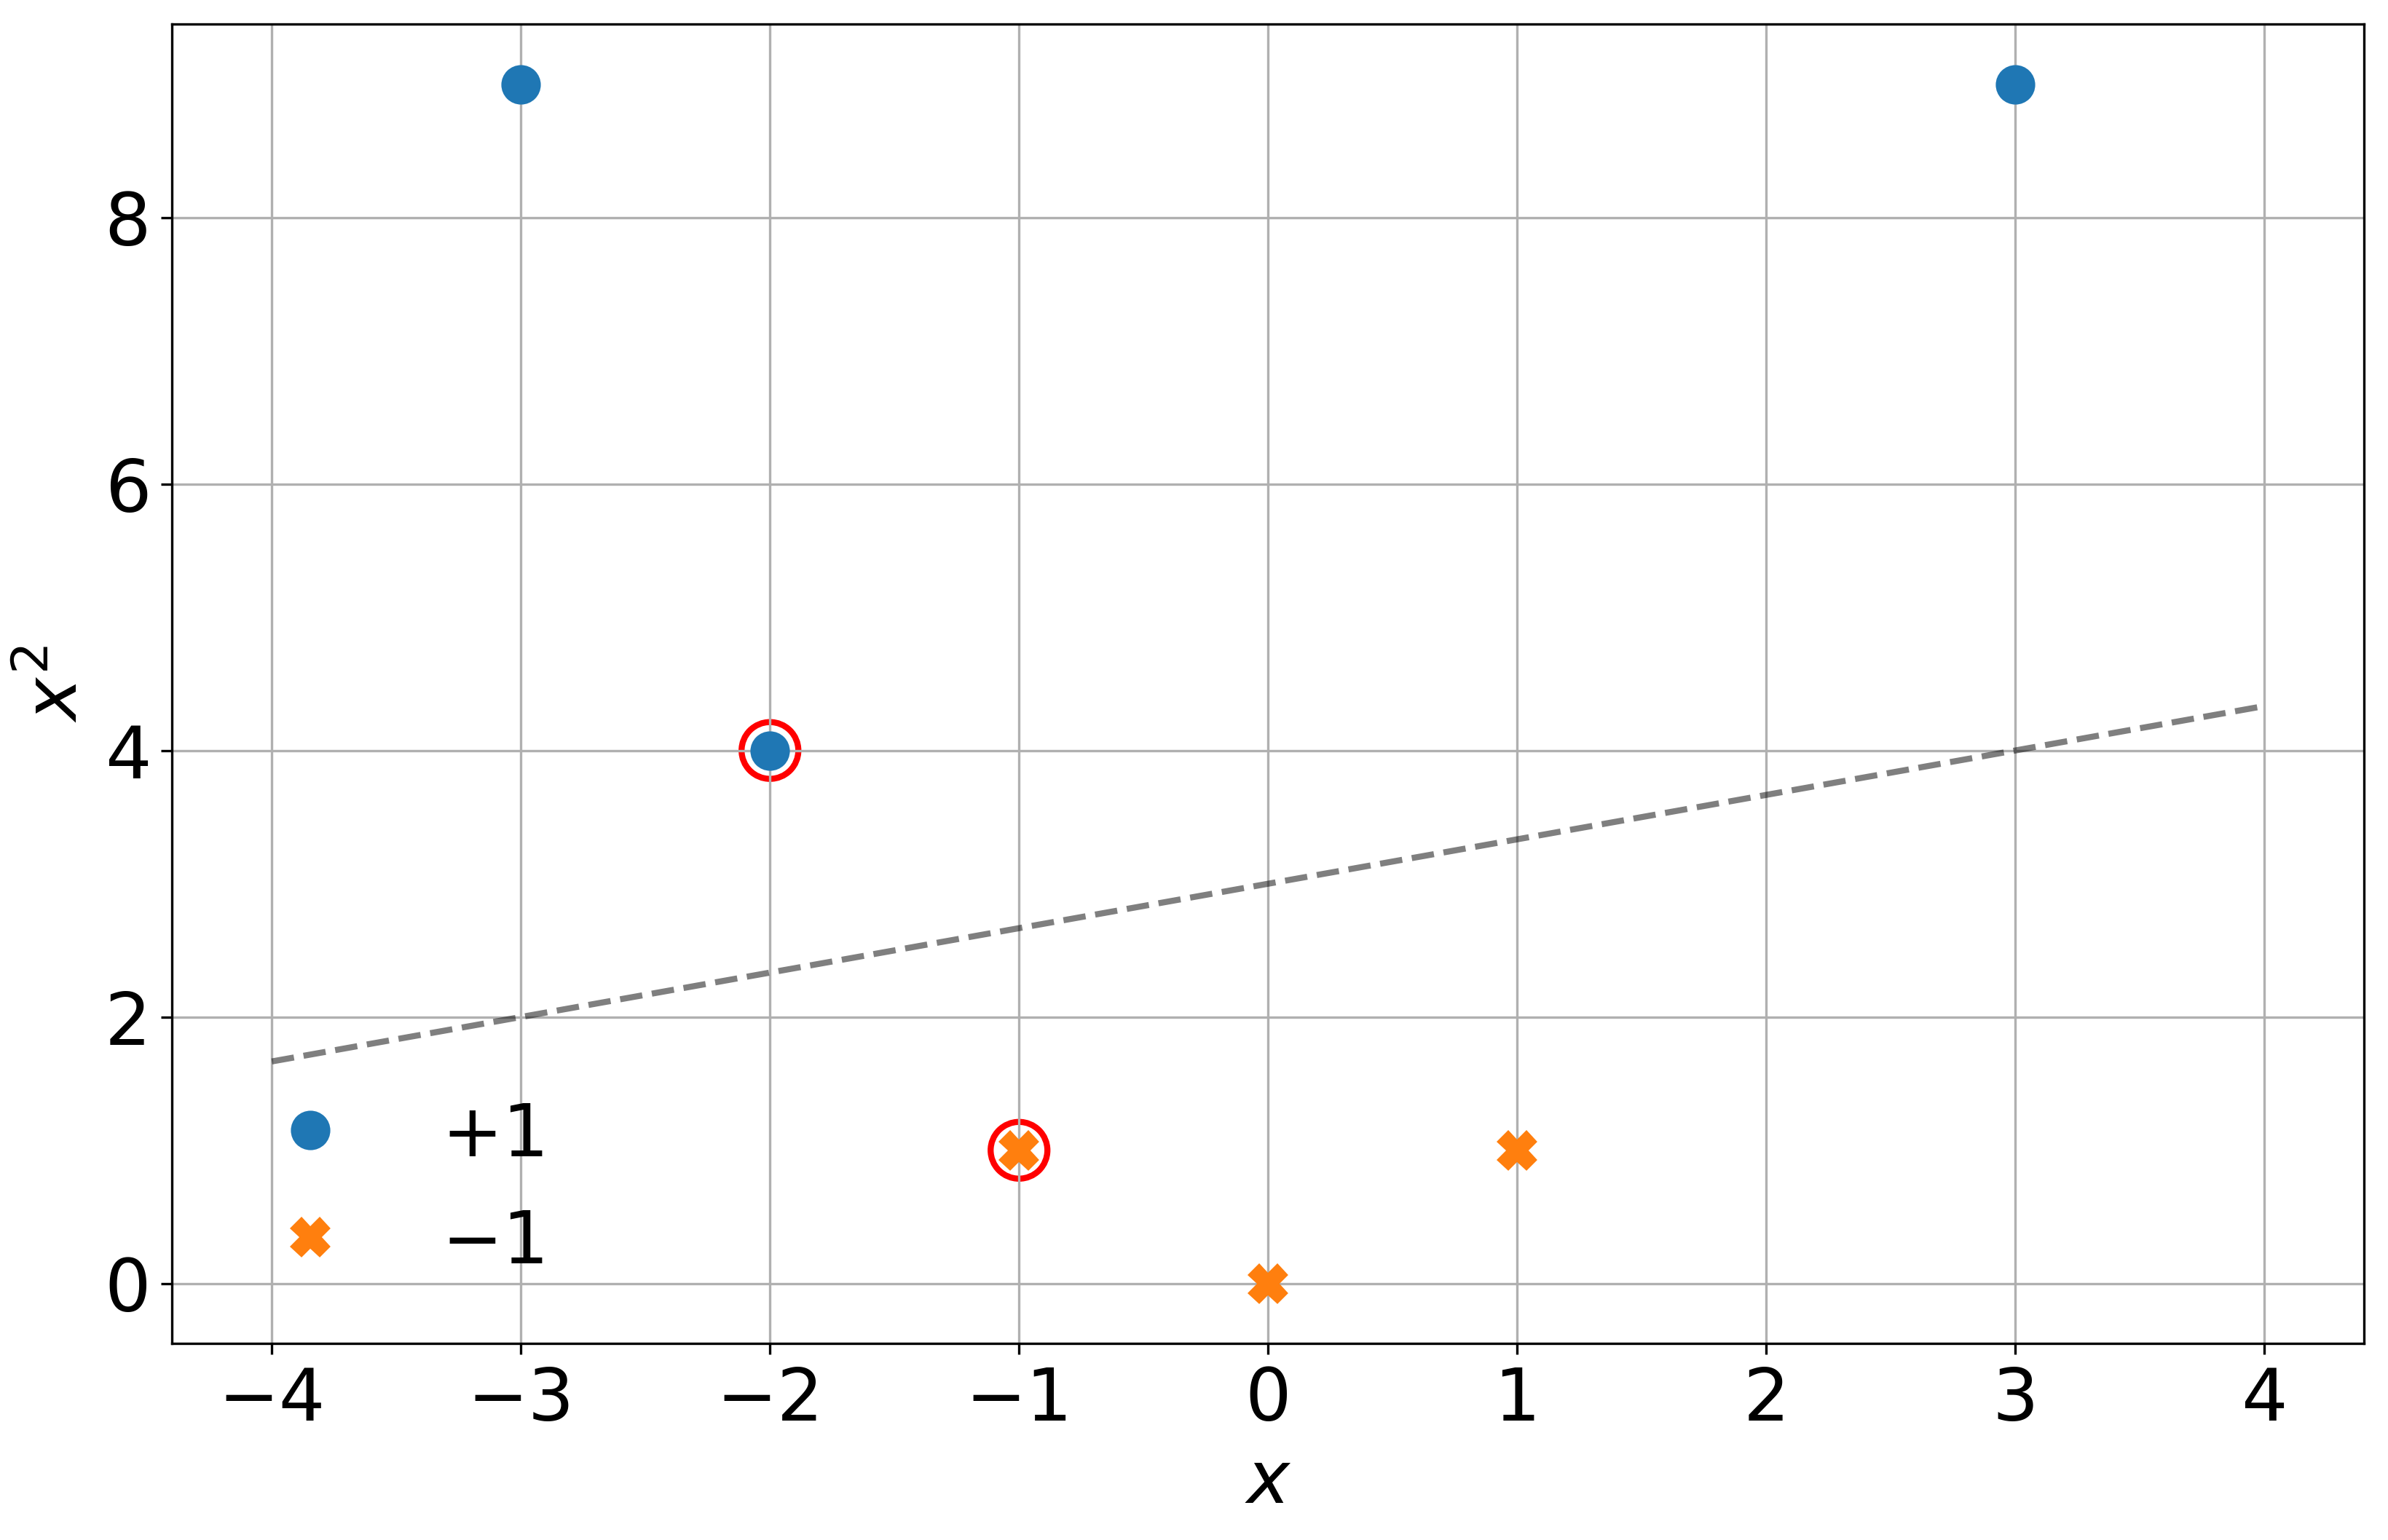

In [170]:
w5 = [-0.2, 0.6]
b5 = -1.8

xfit = np.linspace(min(phi5[0])-1, max(phi5[0])+1, 100)

fig, ax = plt.subplots()
ax.plot(phi5[0][y5==1], phi5[1][y5==1], marker='o', markersize=12, linestyle='', label='$+1$')
ax.plot(phi5[0][y5==-1], phi5[1][y5==-1], marker='X', markersize=12, linestyle='', label='$-1$')
ax.plot(xfit, linear(xfit, w5, b5), linestyle='--', color='k', alpha=0.5)
ax.scatter([-2, -1], [4, 1], facecolors='none', edgecolors='r', s=350, linewidth=2)

ax.set_xlabel('$x$')
ax.set_ylabel('$x^2$')

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid()
fig.savefig('5d.png', bbox_inches='tight')

## e)

In [149]:
def quad_eq(a, b, c):
    left = -b
    right = np.sqrt(b**2 - 4*a*c)
    bot = 2*a
    
    output = ((left + right)/bot, (left - right)/bot)
    
    return output

x values = [1.9067177514850917, -1.5733844181517584]


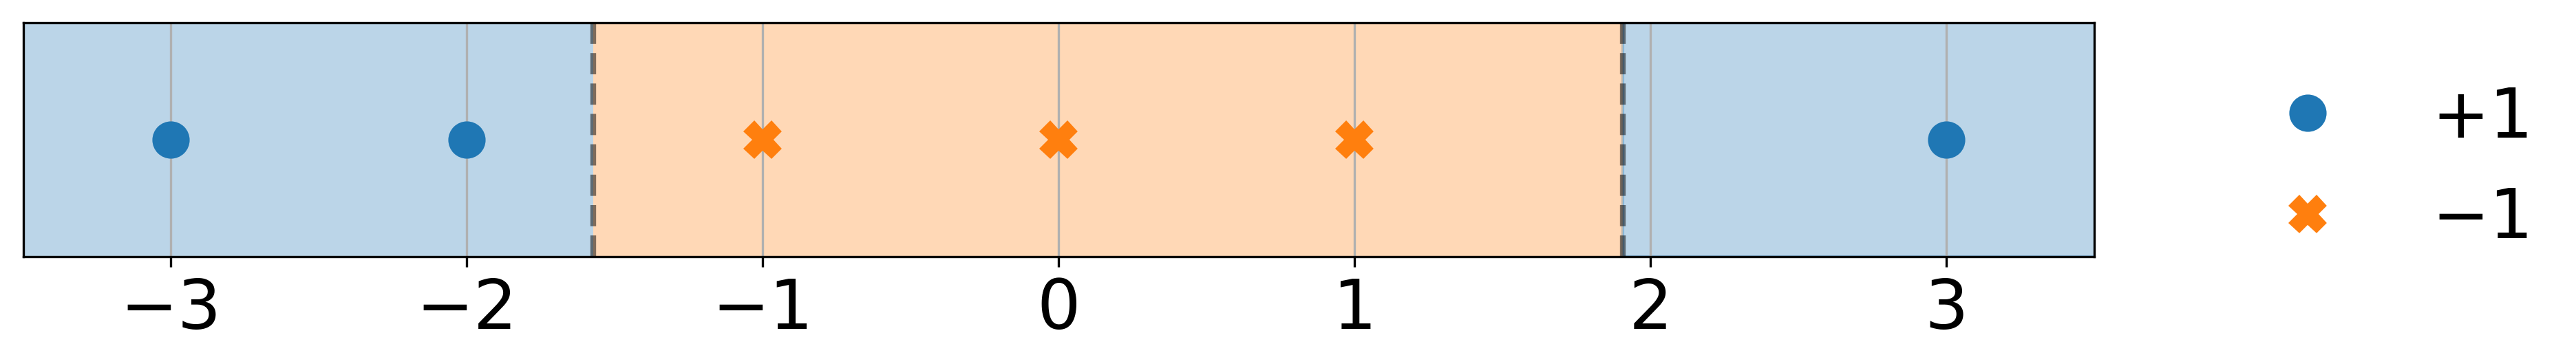

In [153]:
maps = quad_eq(w5d.value[1], w5d.value[0], b5d.value)

fig, ax = plt.subplots()
l, = ax.plot(x5[y5==1], np.zeros(len(y5[y5==1])), marker='o', markersize=12, linestyle='', label='$+1$')
ax.plot(x5[y5==-1], np.zeros(len(y5[y5==-1])), marker='X', markersize=12, linestyle='', label='$-1$')
for i in maps:
    ax.axvline(i, color='k', linestyle='--', alpha=0.5)
ax.fill_betweenx(np.linspace(-1,1), -4, maps[1], alpha=0.3)
ax.fill_betweenx(np.linspace(-1,1), maps[1], maps[0], alpha=0.3)
ax.fill_betweenx(np.linspace(-1,1), maps[0], 4, alpha=0.3, color=l.get_color())

ax.set_yticks([])
ax.set_ylim(-1, 1)
ax.set_xlim(-3.5, 3.5)
npy.format_fig(fig, height=1.5)
npy.format_ax(ax, box_out=True)
ax.grid()

fig.savefig('5e.png', bbox_inches='tight')

print('x values = %s' %(list(maps)))

# 6)

## a)

In [155]:
temp = np.loadtxt('Data.csv', delimiter=',')
temp = temp.transpose()
x6 = temp[[0,1]]
y6 = temp[2]

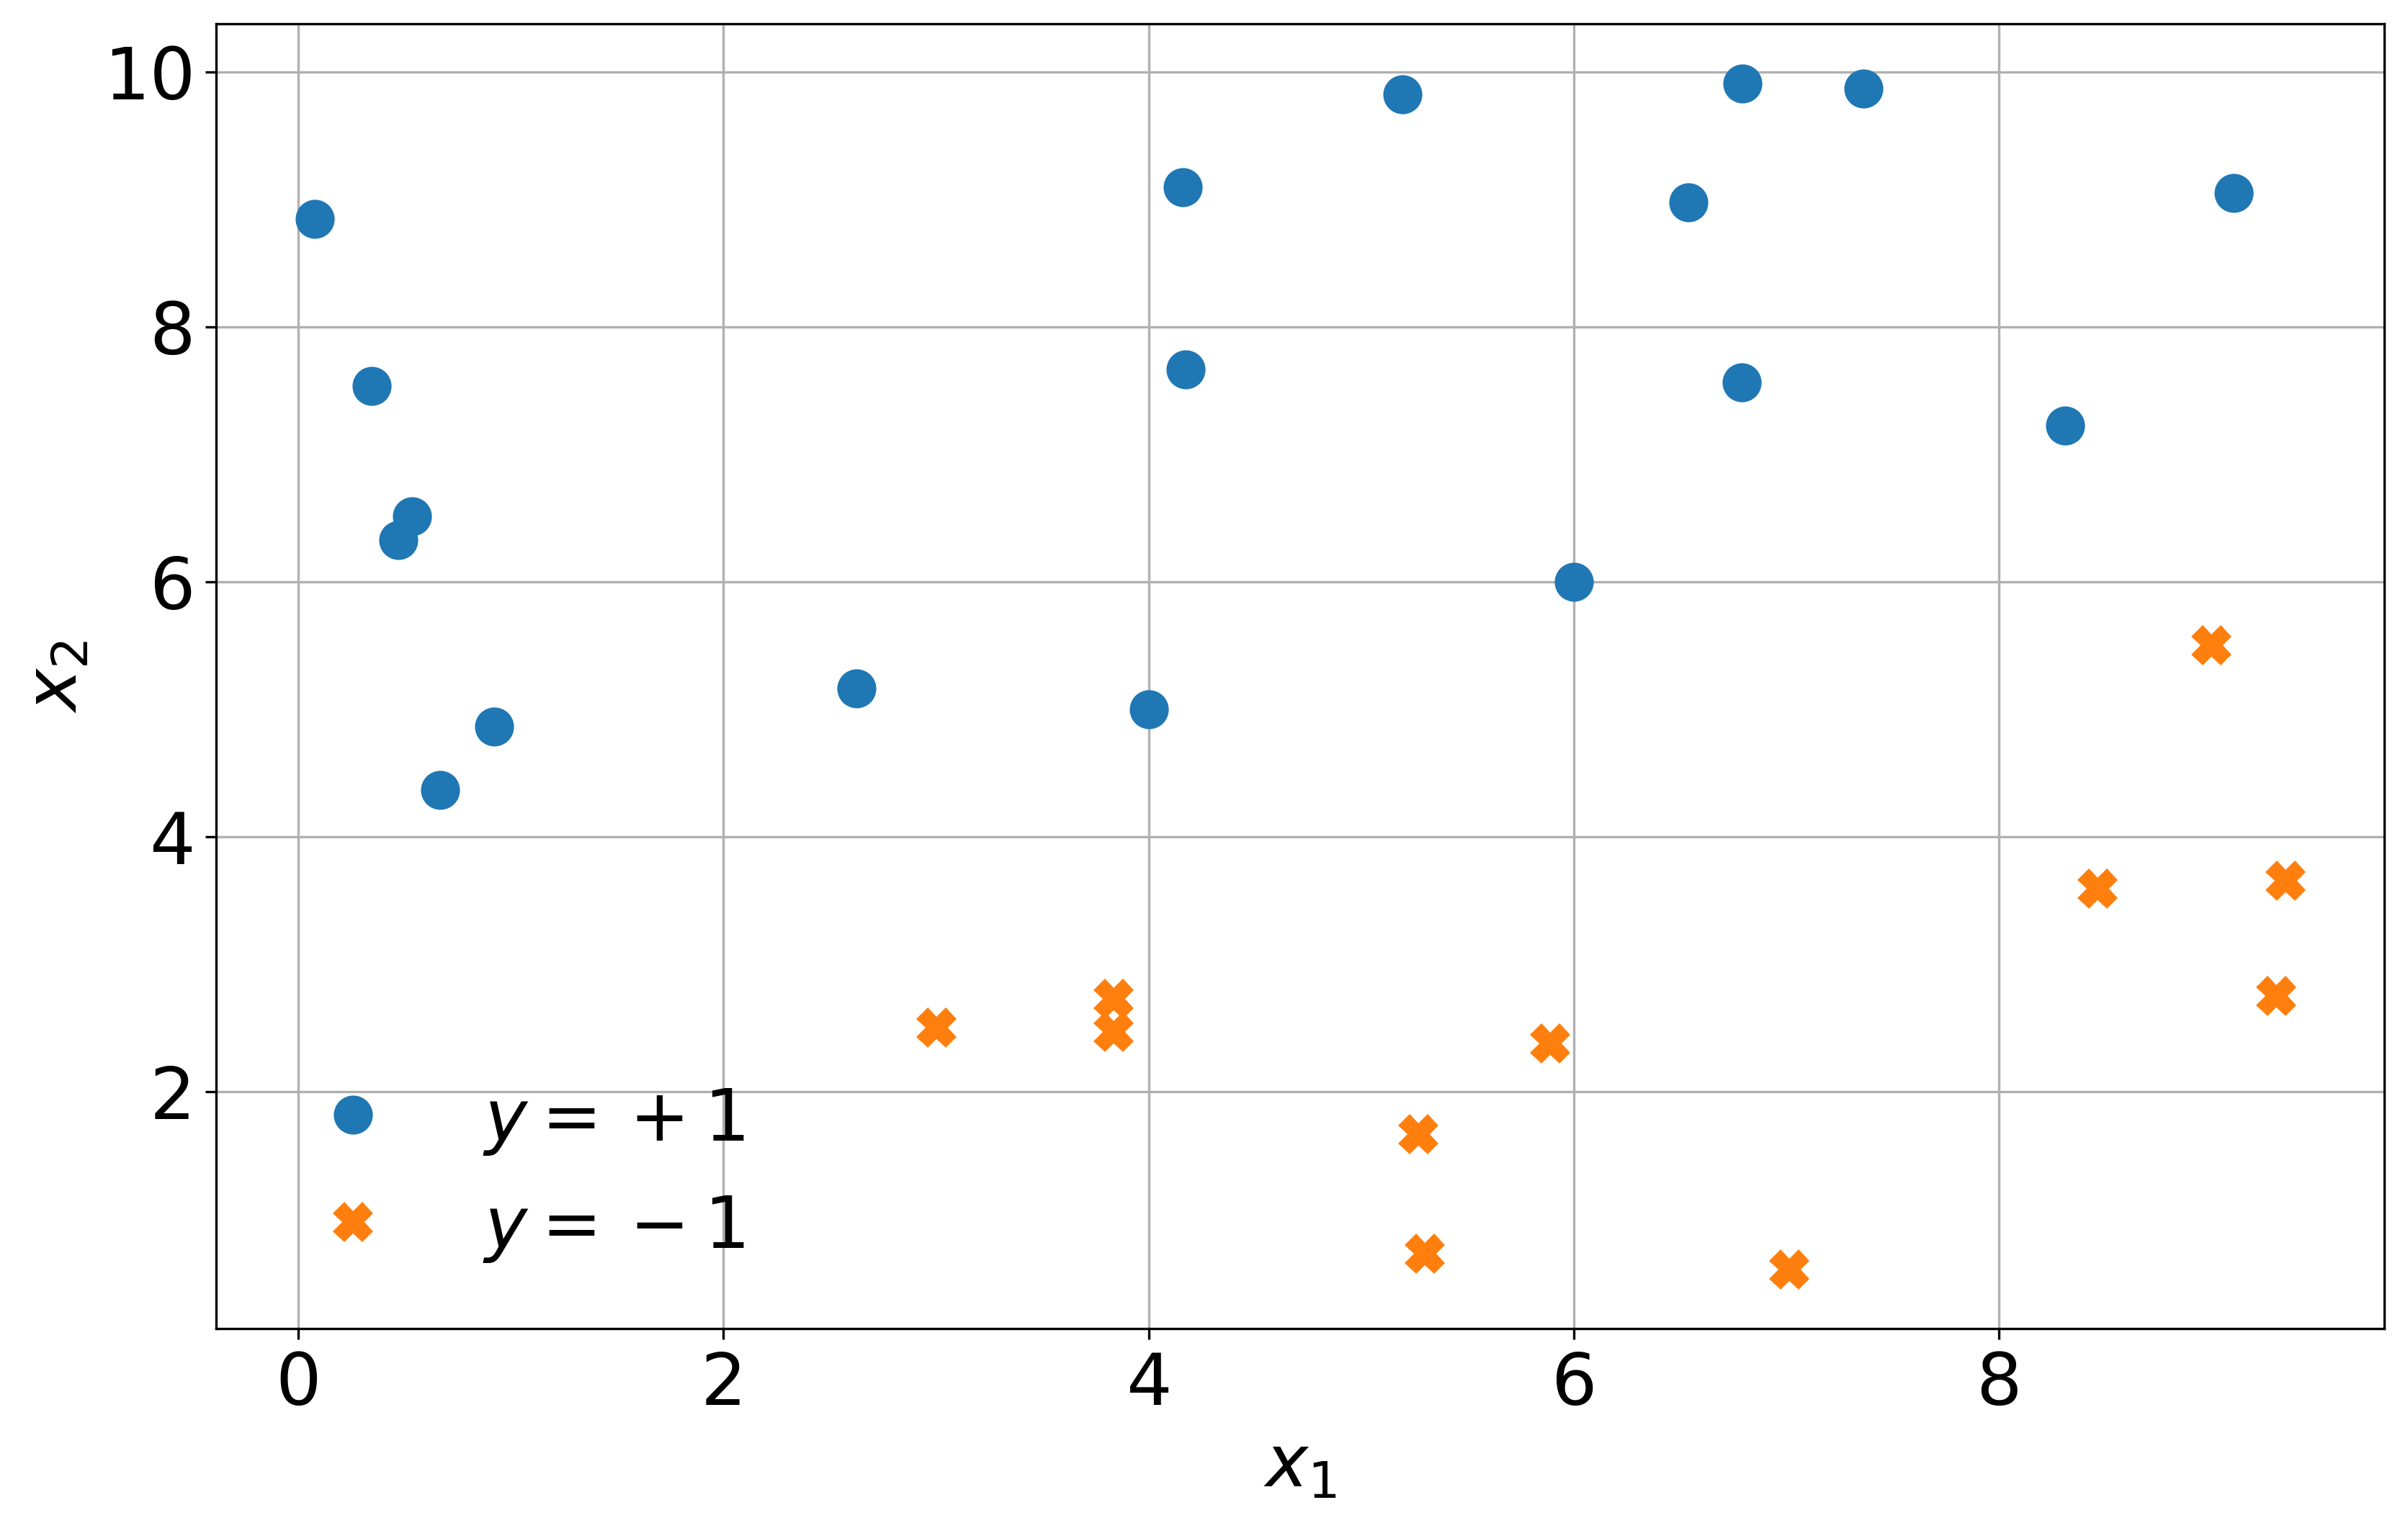

In [156]:
fig, ax = plt.subplots()
ax.plot(x6[0][y6==1], x6[1][y6==1], linestyle='', marker='o', markersize=12, label='$y=+1$')
ax.plot(x6[0][y6==-1], x6[1][y6==-1], linestyle='', marker='X', markersize=12, label='$y=-1$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid(True)

fig.savefig('6a.png', bbox_inches='tight')

## b)

In [ ]:
def primal(x, y, w, b):
    output = []
    for i in range(len(y)):
        temp = y[i]*(x[i] @ w + b)
        output.append(temp)
        
    return output

f(x) = 0.62
w = [-0.50, 1.00]
b = -2.00


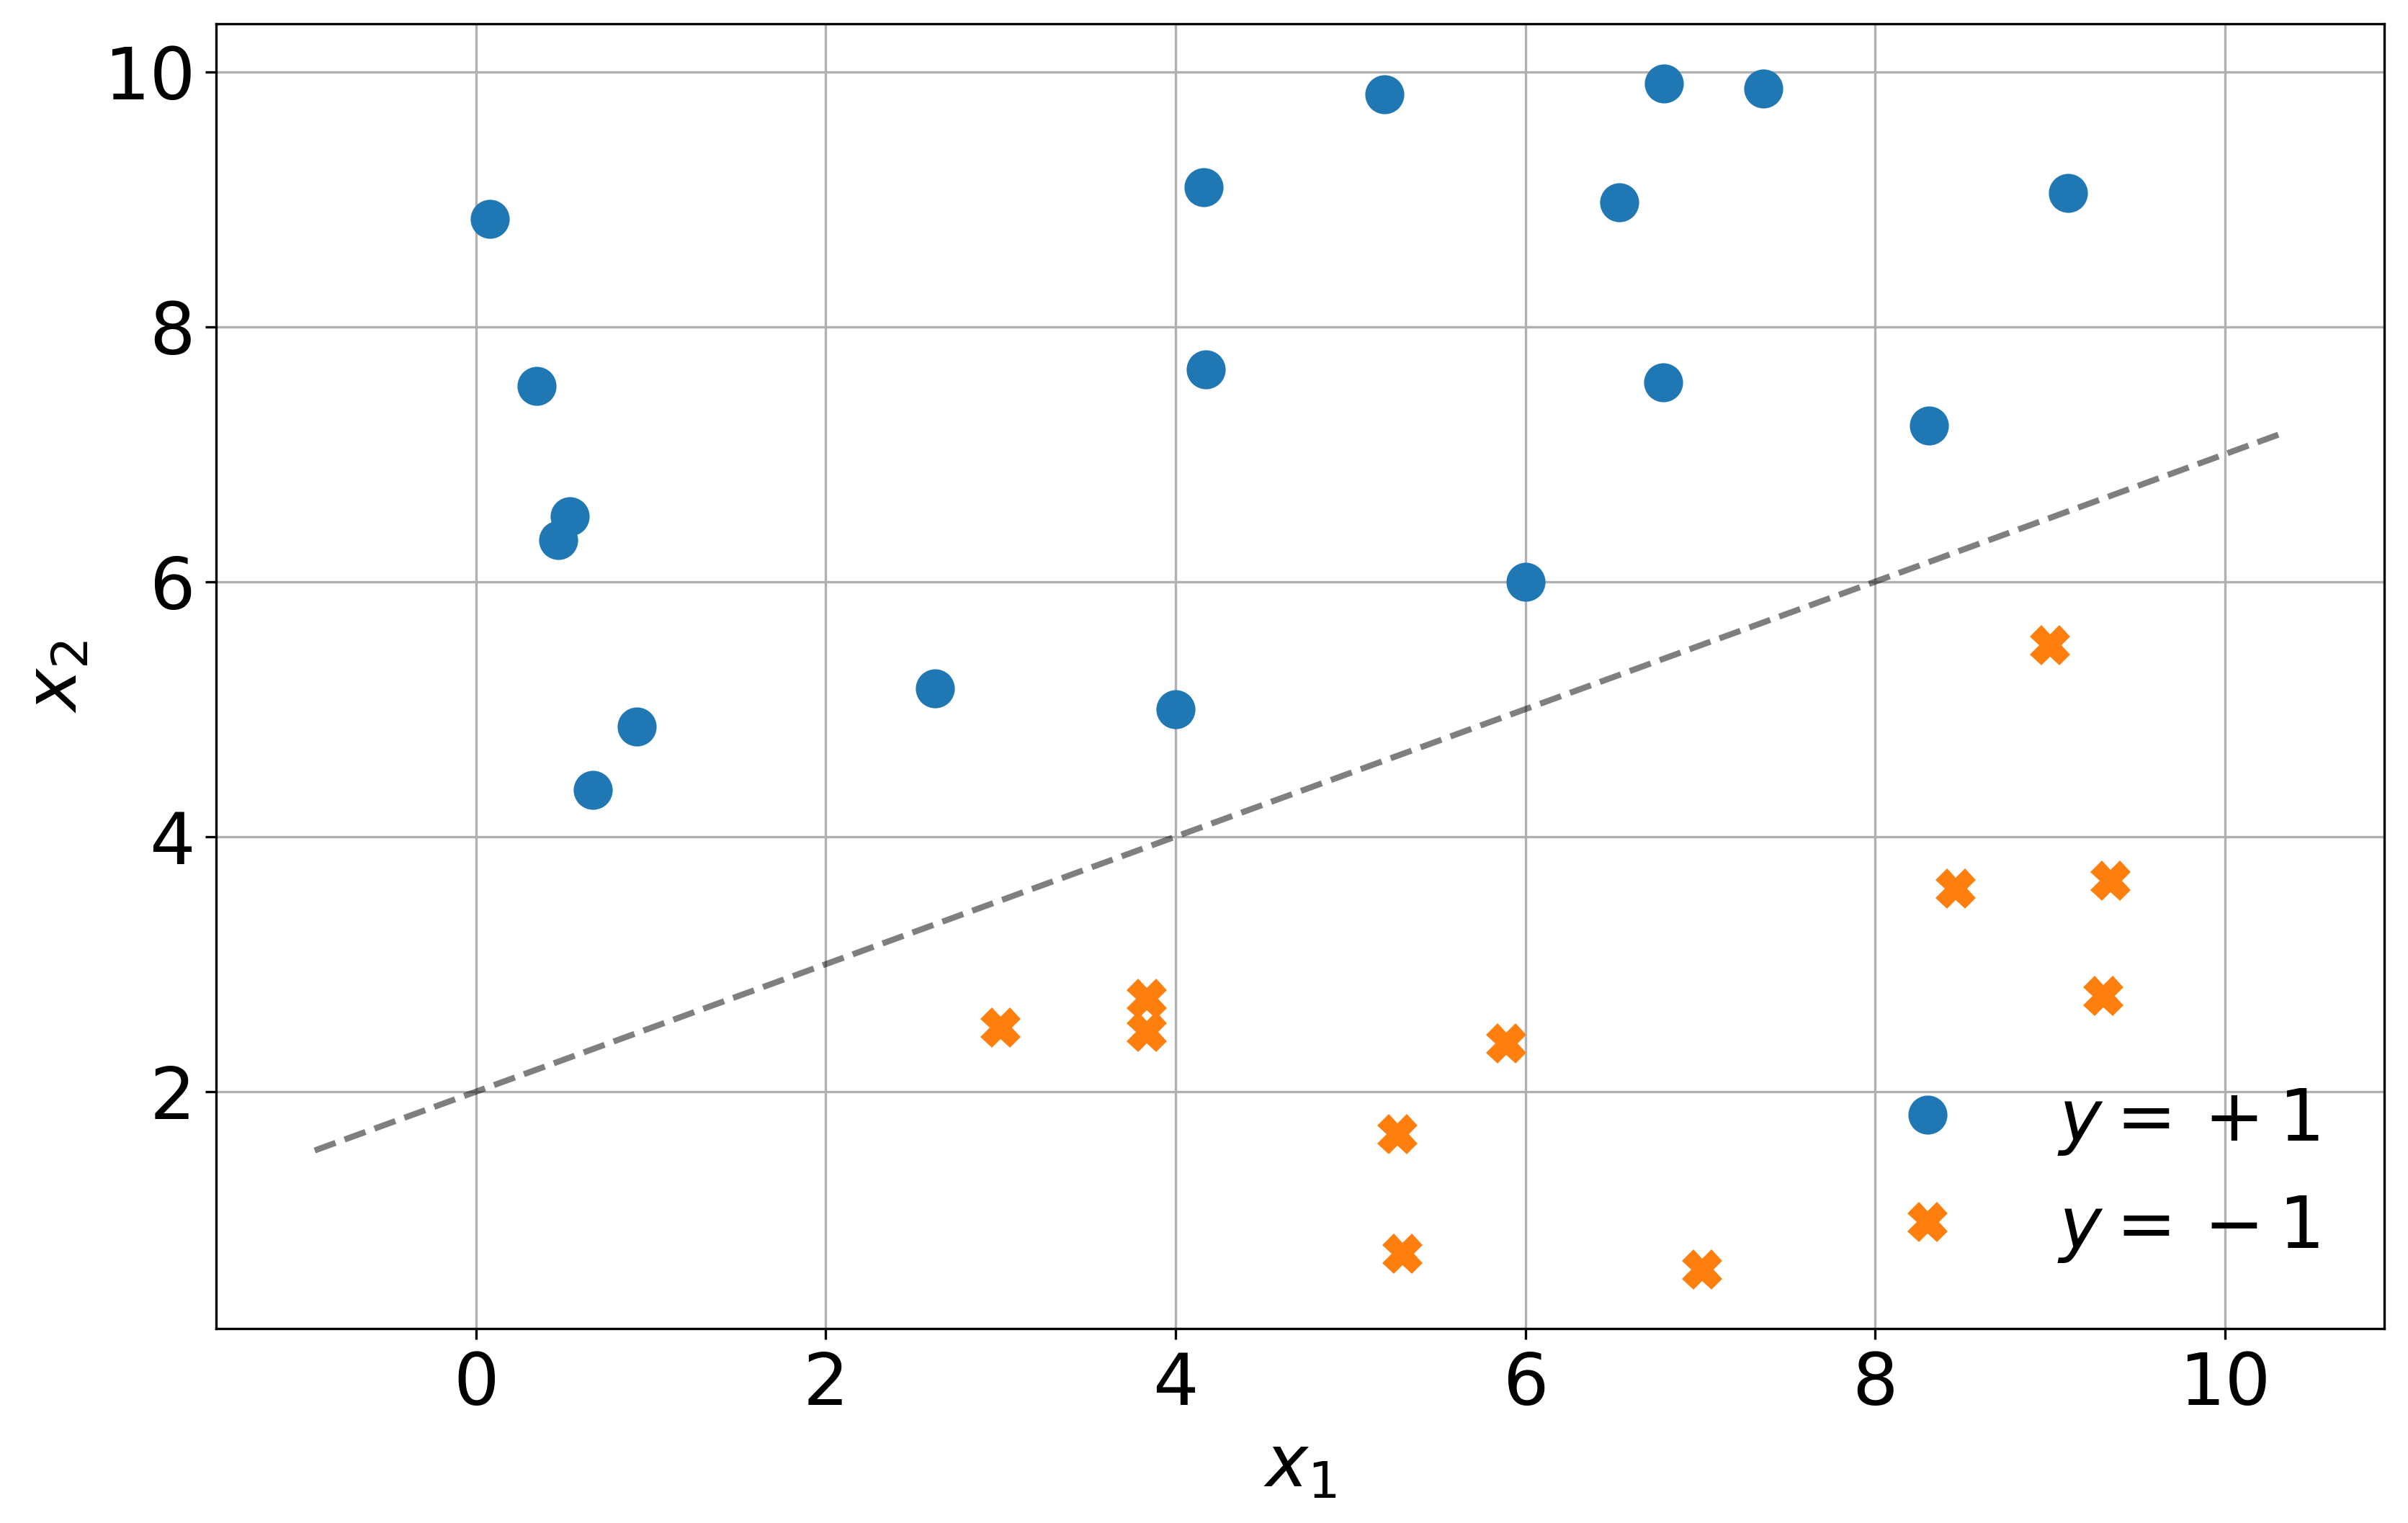

In [157]:
b6 = cvxpy.Variable()
w6 = cvxpy.Variable(2)

obj = cvxpy.Minimize(0.5*cvxpy.sum_squares(w6))
constraints = [i >= 1 for i in primal(x6.T, y6, w6, b6)]
prob = cvxpy.Problem(obj, constraints)
prob.solve()

print('f(x) = %.02f' %prob.value)
print('w = [%.02f, %.02f]' %(w6.value[0], w6.value[1]))
print('b = %.02f' %b6.value)

xfit = np.linspace(min(x6[0])-1, max(x6[0])+1, 100)

fig, ax = plt.subplots()
ax.plot(x6[0][y6==1], x6[1][y6==1], linestyle='', marker='o', markersize=12, label='$y=+1$')
ax.plot(x6[0][y6==-1], x6[1][y6==-1], linestyle='', marker='X', markersize=12, label='$y=-1$')
ax.plot(xfit, linear(xfit, w6.value, b6.value), linestyle='--', color='k', alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid(True)

fig.savefig('6b.png', bbox_inches='tight')

## c)

In [171]:
z = cvxpy.Variable(y6.size)
P = np.dot(x6.T, x6)

g = [z[i] * y6[i] >= 0 for i in range(y6.size)]
h = [cvxpy.sum(z) == 0]
constraints = g + h

prob = cvxpy.Problem(cvxpy.Minimize(0.5*cvxpy.quad_form(z, P) - y6 @ z), constraints)
prob.solve()
w6 = z.value @ x6.T
b6 = y6[-1] - w6 @ x6.T[-1]
a = z.value * y6
a = np.array([i if i > 1e-13 else 0 for i in a])
a_no = a[np.nonzero(a)]

print('f(x) = %.02f' %prob.value)
print('w = %s' %(w6))
print('b = %.02f' %b6)
print('%i nonzero a\'s = %s' %(len(a_no), a_no))

f(x) = -0.62
w = [-0.5  1. ]
b = -2.00
4 nonzero a's = [0.38254571 0.24245429 0.46013714 0.16486286]


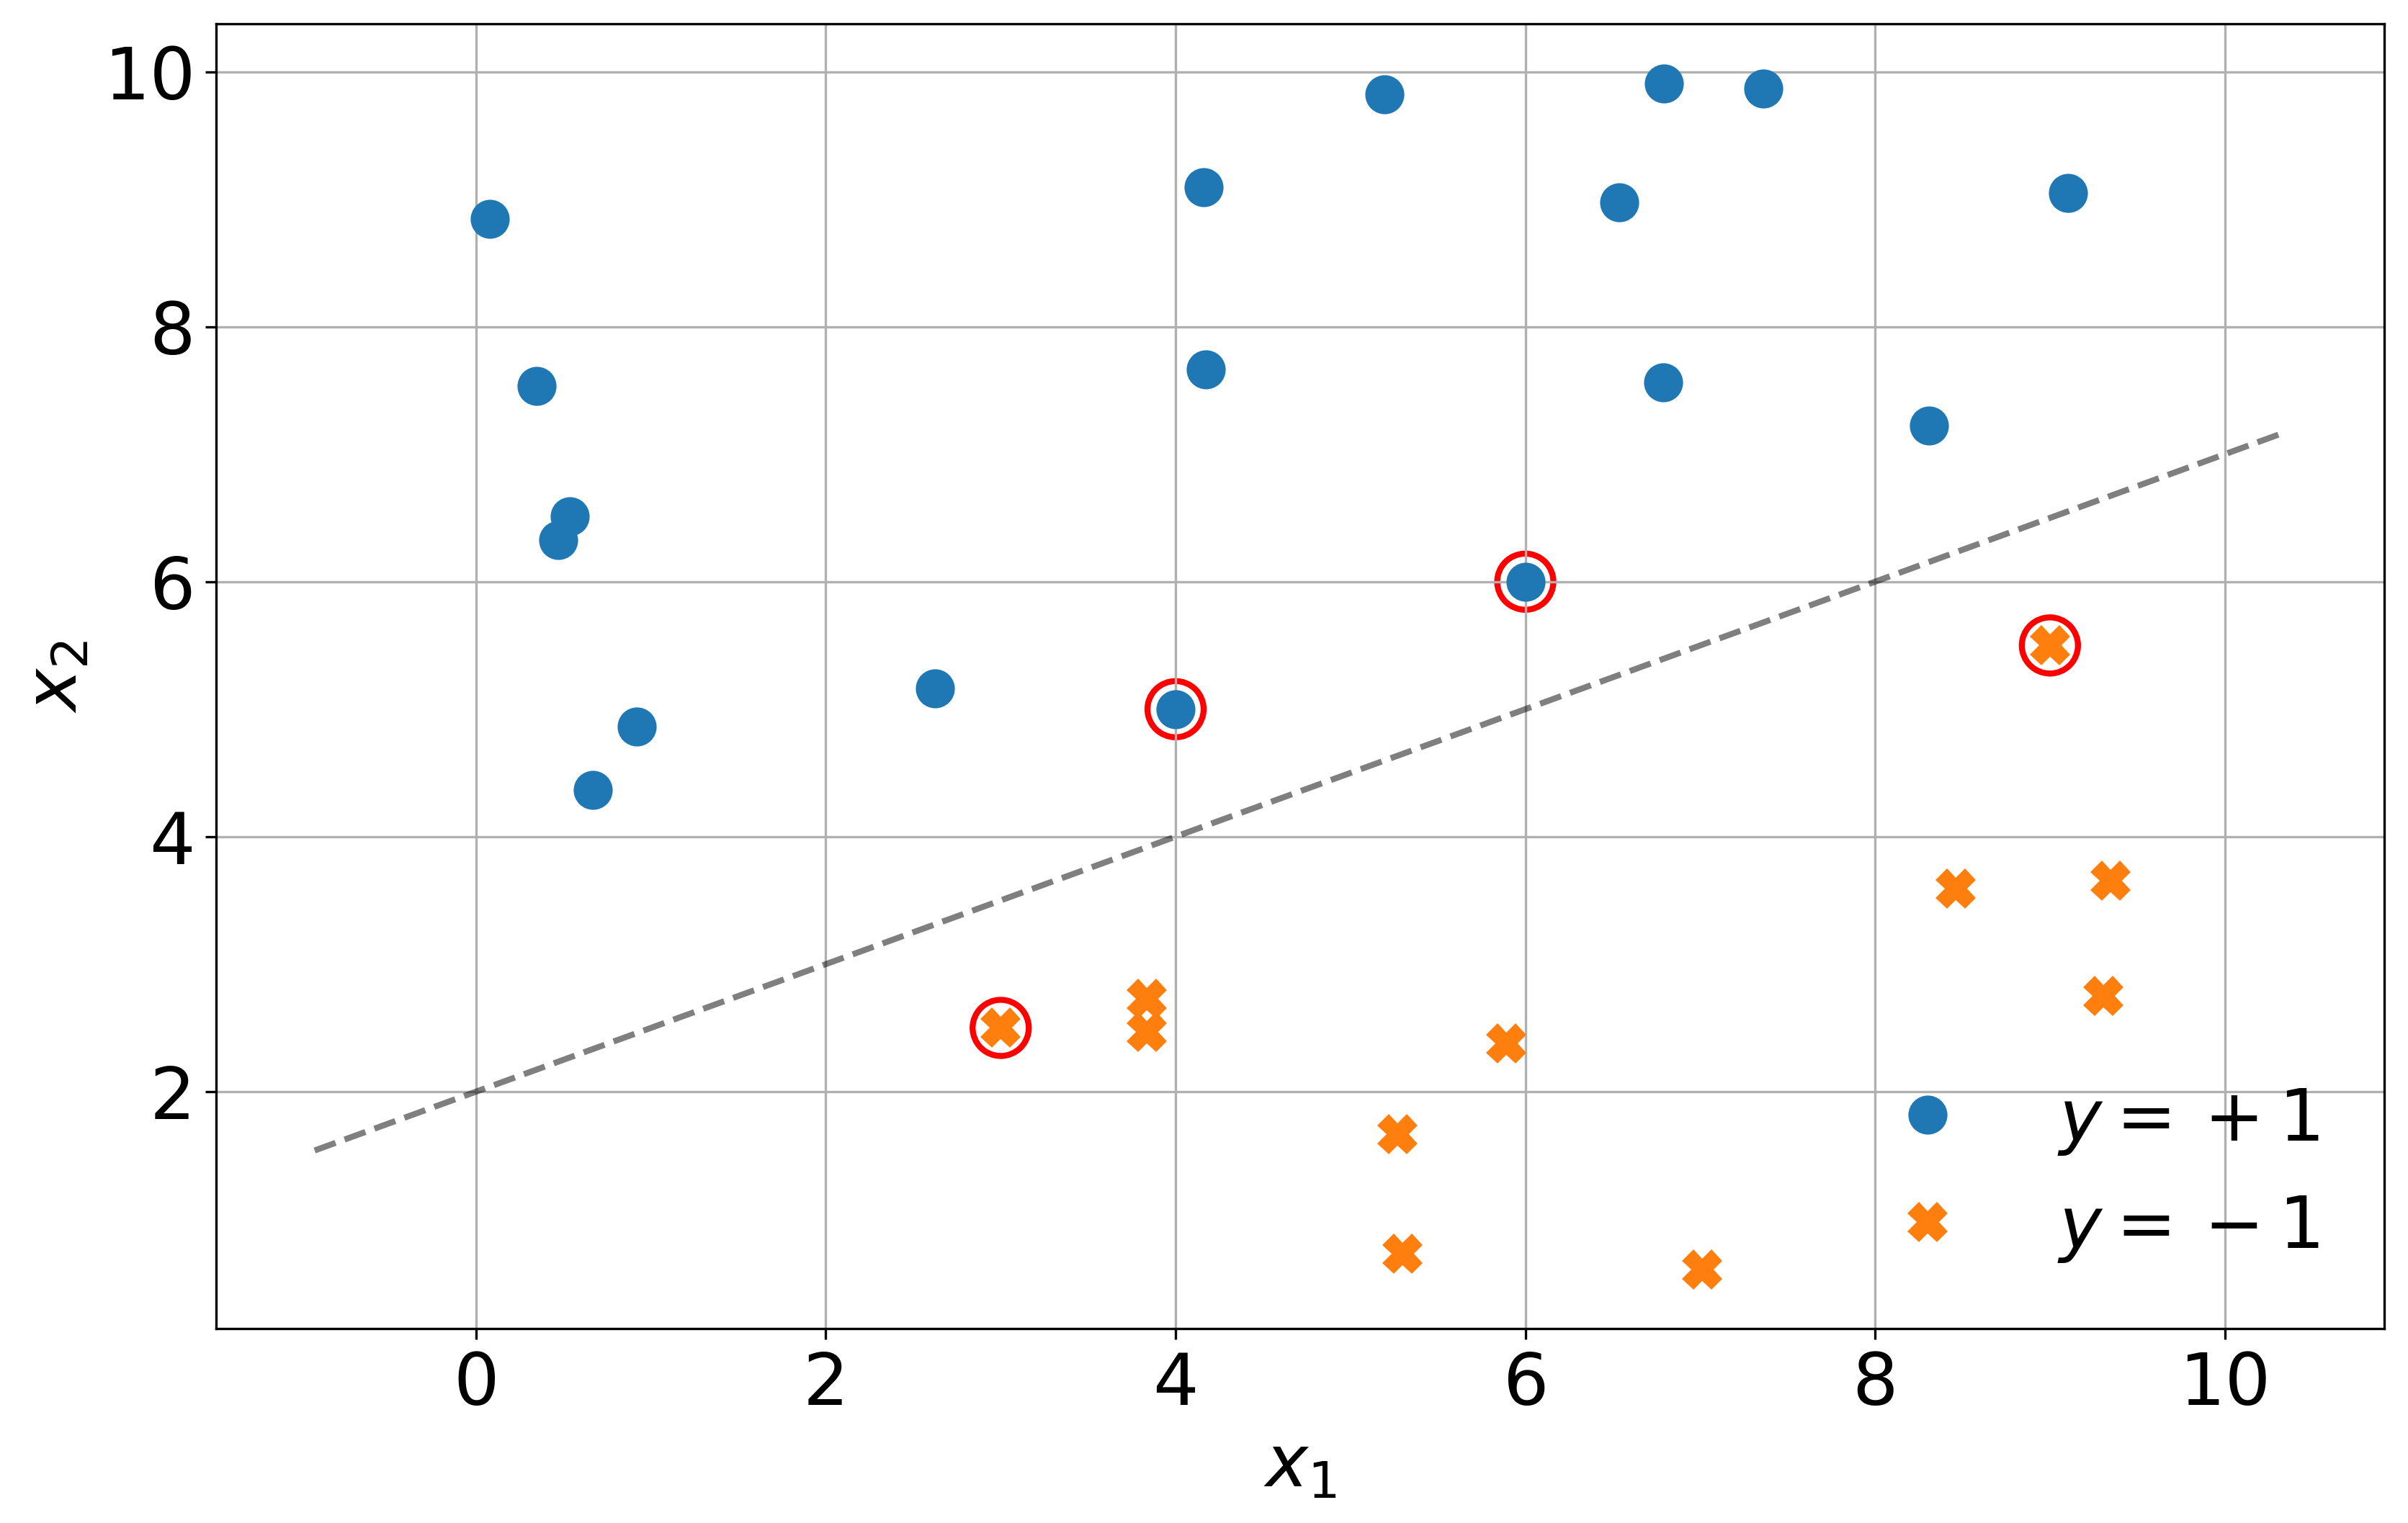

In [172]:
xfit = np.linspace(min(x6[0])-1, max(x6[0])+1, 100)
svs = x6.T[np.nonzero(a)].T

fig, ax = plt.subplots()
ax.plot(x6[0][y6==1], x6[1][y6==1], linestyle='', marker='o', markersize=12, label='$y=+1$')
ax.plot(x6[0][y6==-1], x6[1][y6==-1], linestyle='', marker='X', markersize=12, label='$y=-1$')
ax.plot(xfit, linear(xfit, w6, b6), linestyle='--', color='k', alpha=0.5)
ax.scatter(svs[0], svs[1], facecolors='none', edgecolors='r', s=350, linewidth=2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

npy.format_fig(fig)
npy.format_ax(ax)
ax.grid(True)

fig.savefig('6c.png', bbox_inches='tight')